### Airbnb verisini indirme

http://insideairbnb.com/get-the-data.html adresinden Istanbul veri seti listing.csv indirilecek.

http://insideairbnb.com/istanbul/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false burada görselleştirilmiş hali var.

In [2]:
import numpy as np
import libpysal as lp
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
%matplotlib inline



In [3]:
listings = pd.read_csv('./data/listings.csv')
listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4329'}
#listings = listings.to_crs(epsg=3857)

listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,604,1,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650)
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,685,30,41,2018-11-07,0.35,2,90,POINT (29.04545 41.06984)
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,190,20,13,2018-05-04,0.21,1,273,POINT (28.98216 41.03220)
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,627,3,0,NaN,NaN,19,365,POINT (28.98567 41.04471)
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,690,3,0,NaN,NaN,1,88,POINT (29.05559 41.09048)


In [4]:
print(listings.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'geometry'],
      dtype='object')


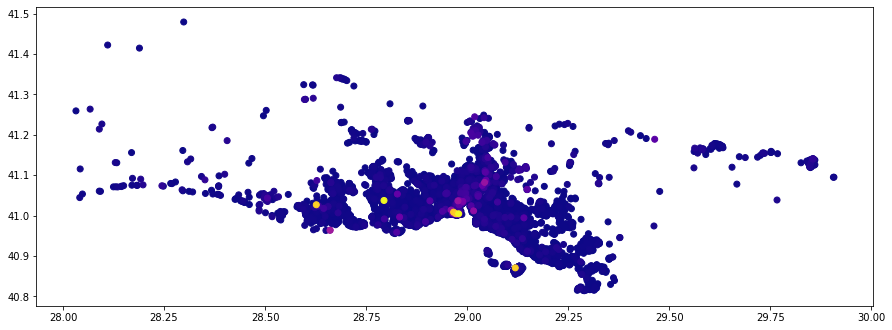

In [5]:
# list values and plot
listings.sort_values('price').plot('price', cmap='plasma', figsize=(15,15))

In [6]:
ist_neigh = gpd.read_file('data/ist_neighbourhoods.geojson')
ist_neigh.head(40)


,neighbourhood,neighbourhood_group,geometry
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41..."
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41..."
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41..."
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41..."
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41..."
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41..."
6,Kagithane,None,"MULTIPOLYGON (((29.00345 41.09491, 29.00361 41..."
7,Buyukcekmece,None,"MULTIPOLYGON (((28.55267 41.10449, 28.55318 41..."
8,Esenyurt,None,"MULTIPOLYGON (((28.63047 41.01797, 28.62855 41..."
9,Beylikduzu,None,"MULTIPOLYGON (((28.68545 41.00178, 28.68214 41..."


In [7]:
#drop nan values
listing2 = listings.dropna(subset=['name'])

listing2.head()
#icinde metrobüs gecen yerleri bul
listing2.loc[listing2['name'].str.contains('metrobüs')]




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
3384,8687718,Kadikoy’de metrobüse 1 dakika uzaklıkta residance,45616080,Eylül,NaN,Kadikoy,40.99019,29.04399,Entire home/apt,161,1,8,2019-10-07,2.64,1,344,POINT (29.04399 40.99019)
5114,15352408,Ferah aydınlık he huzurlu metro ve metrobüse 2...,72694624,Ramazan,NaN,Bahcelievler,40.99292,28.84688,Private room,213,3,2,2019-10-10,0.15,1,364,POINT (28.84688 40.99292)
6255,20784335,haramidere metrobüs /opposite haramidere metrobus,84972136,Bahadir,NaN,Beylikduzu,41.00185,28.67136,Private room,98,1,2,2018-09-23,0.07,1,365,POINT (28.67136 41.00185)
6652,22055291,Cevizlibağ metrobüs tramvay yanı lüks rezidans,161089311,Mert,NaN,Zeytinburnu,41.01756,28.90858,Private room,288,1,0,NaN,NaN,1,0,POINT (28.90858 41.01756)
8484,27284266,İstanbul Mecidiyeköy merkeze metroya metrobüse...,81861161,Çağatay,NaN,Sisli,41.07007,28.99675,Private room,5620,1,0,NaN,NaN,1,0,POINT (28.99675 41.07007)
8750,27771225,"yanyana sıralı bina ,denize 2 km , metrobüs yanı",209680493,Selma,NaN,Bahcelievler,40.99515,28.83615,Private room,69,1,1,2019-10-02,0.50,1,364,POINT (28.83615 40.99515)
9369,28708719,beşyol metrobüs durağında 3+1 daire,214002970,Erdem,NaN,Kucukcekmece,40.99438,28.79387,Private room,132,2,1,2018-12-17,0.09,1,365,POINT (28.79387 40.99438)
9384,28728456,Cadde üzerinde metrobüse 2.dk yürüme mesafesinde,216695667,Şule,NaN,Uskudar,41.01417,29.05751,Private room,86,1,0,NaN,NaN,1,364,POINT (29.05751 41.01417)
10097,29848520,"Geniş ve balkonlu rahat,metrobüse sıfır, klimalı.",224485280,Ömer,NaN,Kagithane,41.06461,28.96878,Private room,150,1,0,NaN,NaN,1,364,POINT (28.96878 41.06461)
10137,29911367,"Metro, otobüs, metrobüs, dolmuş, 1 dakika merk...",223988779,Gul,NaN,Bahcelievler,40.99276,28.84690,Private room,288,1,0,NaN,NaN,2,179,POINT (28.84690 40.99276)


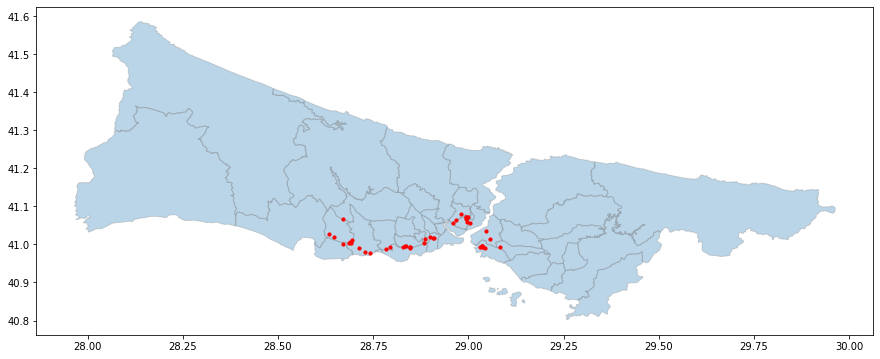

In [13]:
# icinde metrobus gecenleri cizdirelim
ax = ist_neigh.plot(figsize=(15,15), alpha = 0.3, edgecolor='gray')
listing2.loc[listing2['name'].str.contains('metrobüs')].plot(ax=ax, color='red', marker='o', markersize=10)


### İlçelere Ortalama Oda Fiyatlarının İşlenmesi

In [8]:
joined = gpd.sjoin(listings, ist_neigh, op='within', how='left')

C:\Users\Kaan\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4329'} != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [9]:
joined.head(100)

,id,name,host_id,host_name,neighbourhood_group_left,neighbourhood_left,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry,index_right,neighbourhood_right,neighbourhood_group_right
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,604,1,1,2009-06-01,0.01,1,365,POINT (29.05367 41.05650),26.0,Uskudar,None
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,685,30,41,2018-11-07,0.35,2,90,POINT (29.04545 41.06984),23.0,Besiktas,None
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03220,28.98216,Entire home/apt,190,20,13,2018-05-04,0.21,1,273,POINT (28.98216 41.03220),22.0,Beyoglu,None
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,627,3,0,NaN,NaN,19,365,POINT (28.98567 41.04471),25.0,Sisli,None
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,690,3,0,NaN,NaN,1,88,POINT (29.05559 41.09048),3.0,Sariyer,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,265297,"Sunny Flat for Room Price, Taksim",1391673,Serkan,NaN,Sisli,41.04500,28.98630,Entire home/apt,288,2,2,2012-05-28,0.02,1,90,POINT (28.98630 41.04500),25.0,Sisli,None
96,265772,Furnished Flats & Historical Room,1393796,Hülya,NaN,Sisli,41.05458,28.98672,Private room,230,1,0,NaN,NaN,2,365,POINT (28.98672 41.05458),25.0,Sisli,None
97,270561,"Room minuet 2TRAM Street,Yusufpasha اتفضلوااهل...",1351134,Bãśmä,NaN,Fatih,41.01077,28.94512,Private room,92,2,152,2019-09-22,1.58,14,87,POINT (28.94512 41.01077),21.0,Fatih,None
98,270883,only 10 minutes to Sultanahmet,1417732,Tayfun,NaN,Fatih,41.02480,28.94738,Entire home/apt,316,7,0,NaN,NaN,1,365,POINT (28.94738 41.02480),21.0,Fatih,None


In [10]:
#ilçelere göre groupby

calculated = joined.groupby(['neighbourhood_right']).mean()




In [11]:
# grupla ve sırala
joined.groupby(['neighbourhood_right']).mean().sort_values('price', ascending=False)
#grupla ve toplamları al
joined['count'] = 1

toplamlar = joined.groupby(['neighbourhood_right']).count()['count']

toplamlar

neighbourhood_right
Adalar            163
Arnavutkoy         46
Atasehir          368
Avcilar           198
Bagcilar          125
Bahcelievler      233
Bakirkoy          287
Basaksehir        246
Bayrampasa         33
Besiktas         1698
Beykoz            104
Beylikduzu        108
Beyoglu          5787
Buyukcekmece      116
Catalca            13
Cekmekoy           54
Esenler            23
Esenyurt          536
Eyup              205
Fatih            2677
Gaziosmanpasa      77
Gungoren           75
Kadikoy          2198
Kagithane         546
Kartal            180
Kucukcekmece      169
Maltepe           371
Pendik            196
Sancaktepe         47
Sariyer           335
Sile              129
Silivri            47
Sisli            3033
Sultanbeyli        17
Sultangazi         25
Tuzla              97
Umraniye          214
Uskudar           756
Zeytinburnu       102
Name: count, dtype: int64

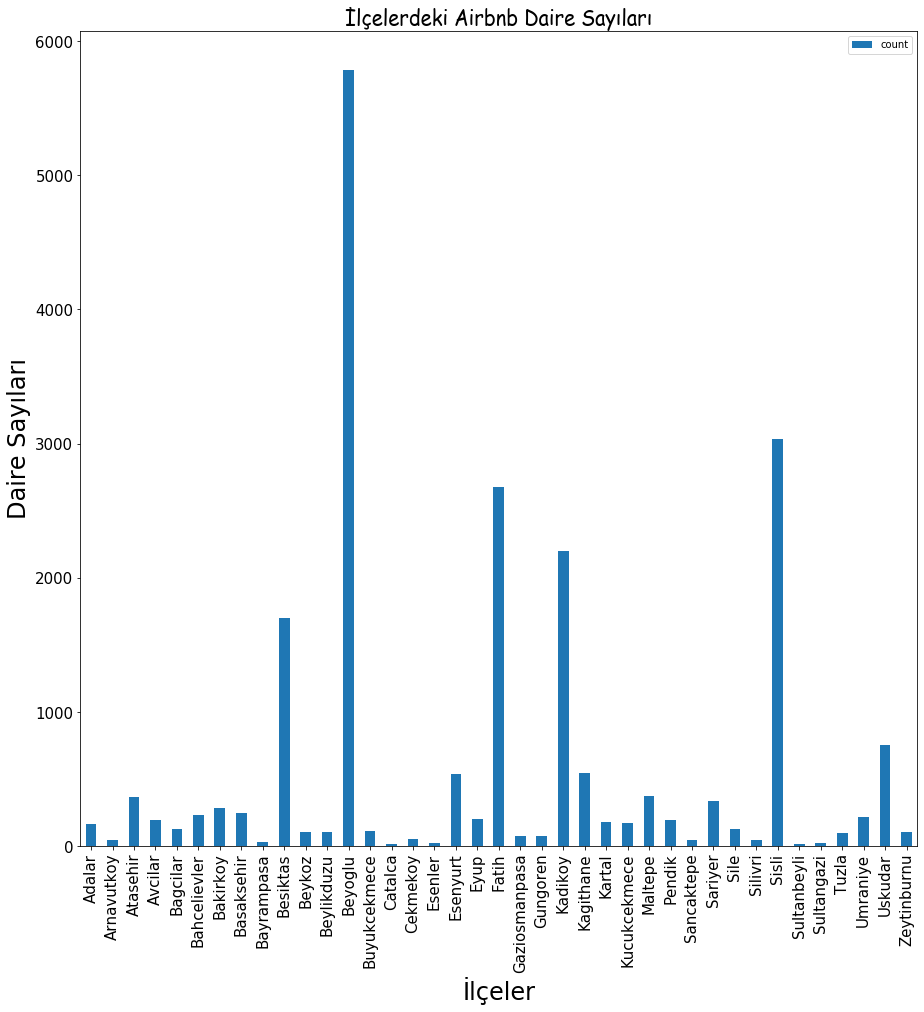

In [12]:
ax = toplamlar.plot(kind='bar', figsize=(15,15), fontsize=15)
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.xlabel('İlçeler', fontsize=24)
plt.ylabel('Daire Sayıları', fontsize=24)
plt.legend()
plt.show
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli.png')


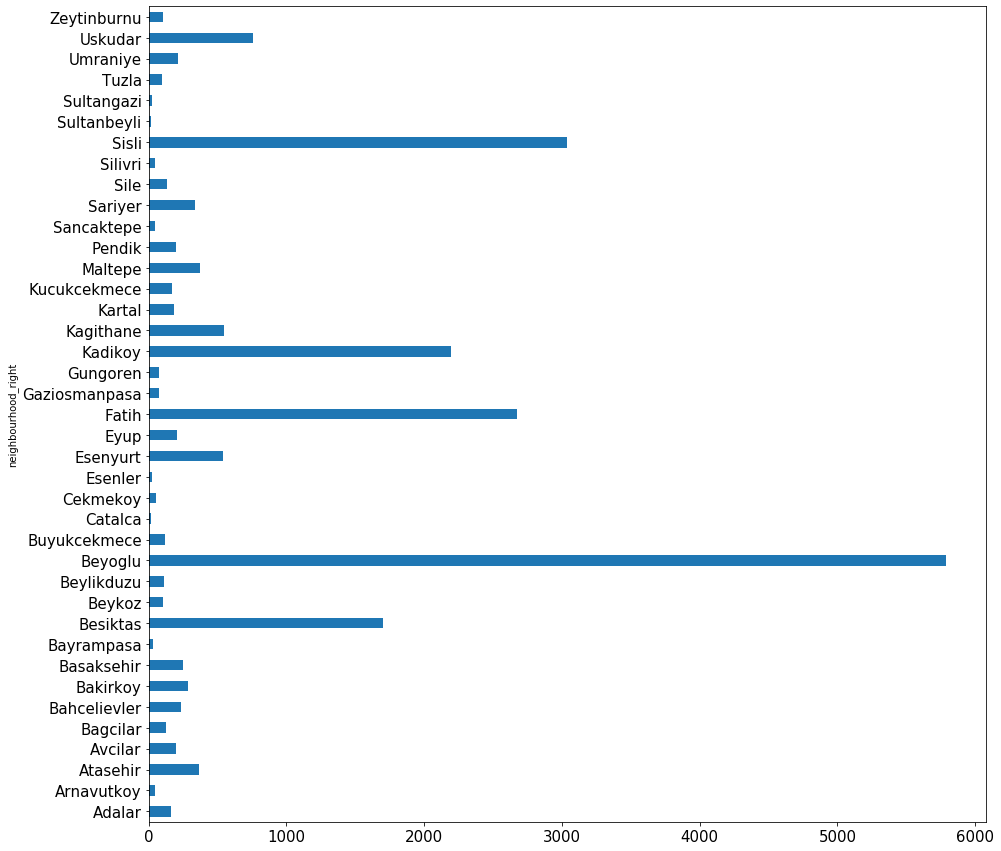

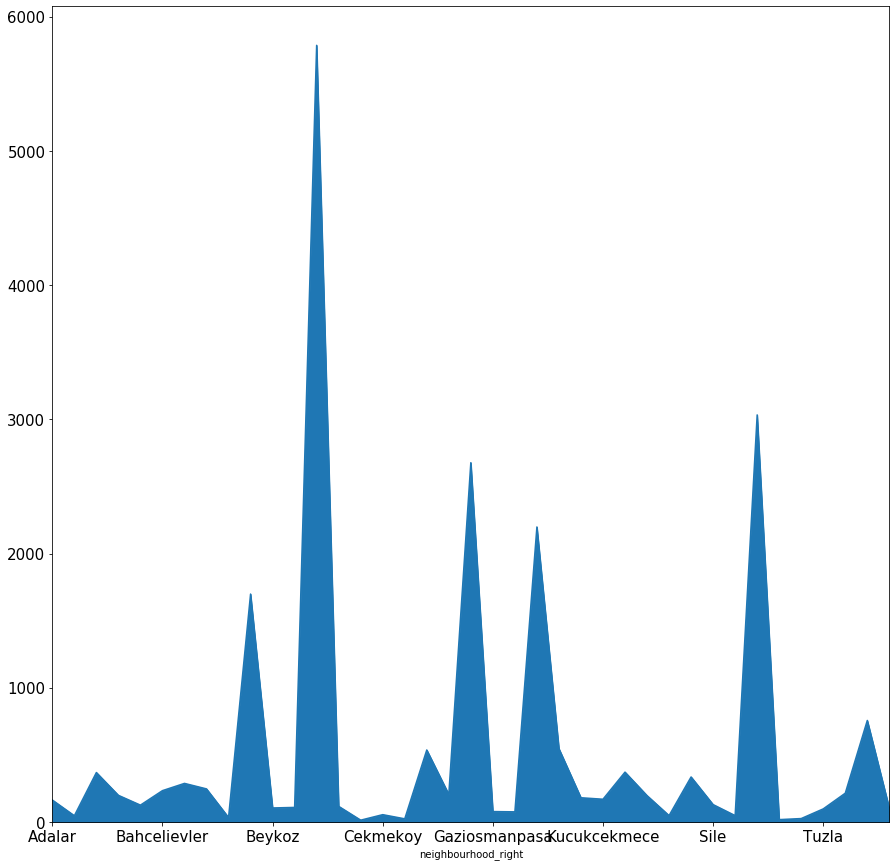

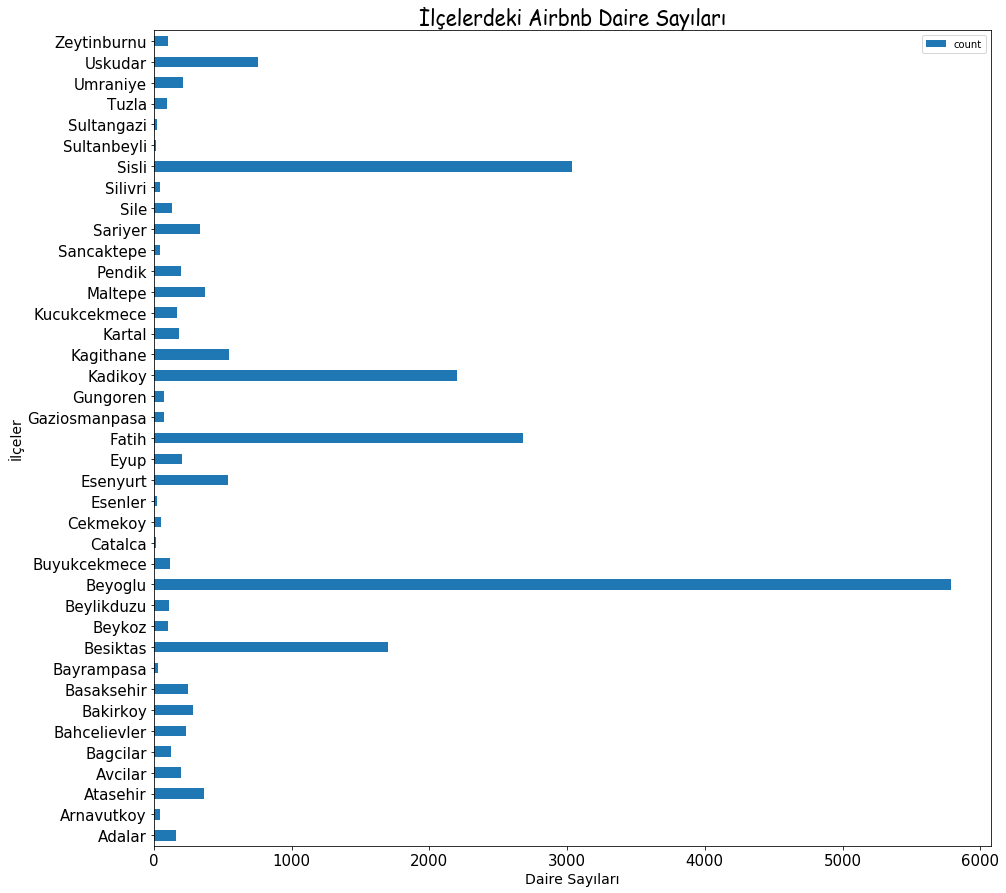

In [13]:
toplamlar.plot(kind='barh', figsize=(15,15), fontsize=15)
plt.figure()

toplamlar.plot(kind='area', figsize=(15,15), fontsize=15)


plt.figure()

ax = toplamlar.plot(kind='barh', figsize=(15,15), fontsize=15)
plt.title('İlçelerdeki Airbnb Daire Sayıları', fontdict={'fontname': 'Comic Sans MS', 'fontsize':20})
plt.ylabel('İlçeler', fontsize=14)
plt.xlabel('Daire Sayıları', fontsize=14)
plt.legend()
plt.show
plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-h.png')



In [14]:
# hesaplanan ilce fiyat ortalamalarini ilce geojson'a yazdırma
type(toplamlar)

#seri tipi veriyi dataframe e cevirme
toplamlar2 = toplamlar.to_frame()

type(toplamlar2)

calculated.head(40)
ist_neigh_merge = ist_neigh.merge(calculated, left_on='neighbourhood', right_on='neighbourhood_right')
ist_neigh_merge.head()
ist_neigh_merge = ist_neigh_merge.merge(toplamlar, left_on='neighbourhood', right_on='neighbourhood_right')
ist_neigh_merge.head()

ist_neigh_merge.to_file("outputs/ist_neigh_merge.geojson", driver='GeoJSON')

ist_neigh_merge.head()


,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right,count
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",2.849996e+07,1.313226e+08,NaN,41.149020,29.715138,615.806202,2.062016,4.201550,0.741449,3.015504,251.620155,0.0,129
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",2.093747e+07,1.409854e+08,NaN,41.266476,28.408160,728.076923,2.846154,0.538462,0.140000,1.307692,233.923077,1.0,13
2,Eyup,None,"MULTIPOLYGON (((28.94881 41.26322, 28.94760 41...",2.953375e+07,1.526416e+08,NaN,41.103902,28.923162,327.263415,10.721951,2.546341,0.950127,1.819512,202.629268,2.0,205
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",2.540407e+07,1.170302e+08,NaN,41.136732,29.042694,771.029851,6.167164,2.429851,0.541923,3.471642,207.737313,3.0,335
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",3.746397e+07,2.085300e+08,NaN,41.241225,28.702155,614.500000,1.500000,4.521739,3.183500,1.586957,166.173913,4.0,46


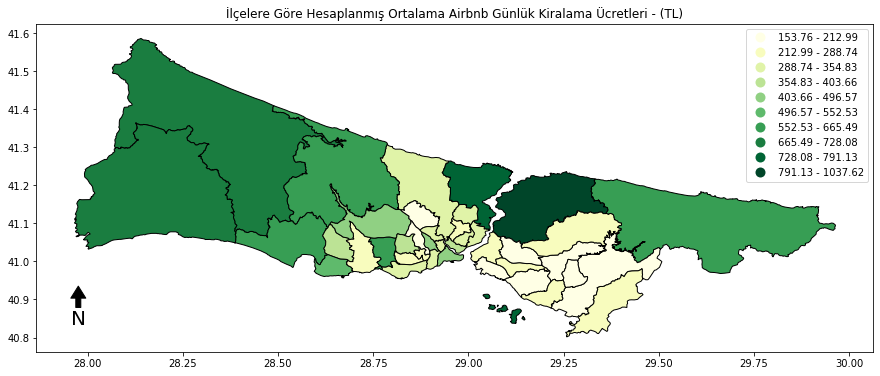

In [15]:
#gorsellestirme

ax = ist_neigh_merge.plot(figsize=(15, 15), column='price', scheme='fisher_jenks', k=10, legend=True, cmap='YlGn', edgecolor='black')

#sihirli kuzey oku ekleme 
x, y, arrow_length = 0.05, 0.2, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
#ax.set_axis_off()
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")

plt.savefig('outputs/istanbul-airbnb-listelenmis-ilce-bazli-map.png', dpi=300)


Text(0.5, 1, 'İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)')

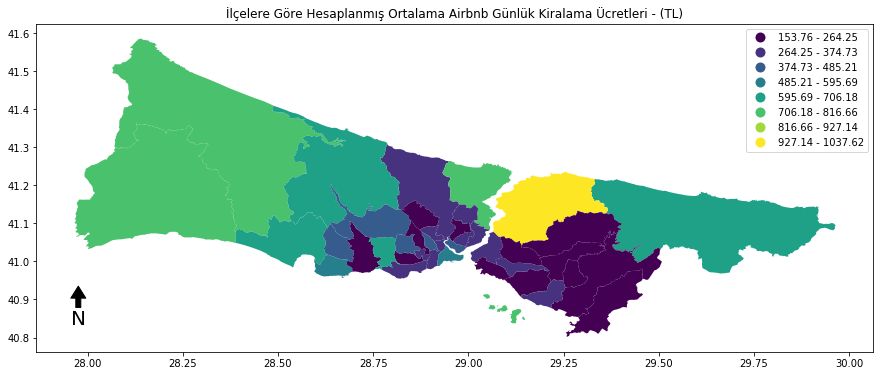

In [16]:
# siniflandirmayi degistirelim


ax = ist_neigh_merge.plot(figsize=(15, 15), column='price', scheme='equal_interval', k=8, legend=True)

#sihirli kuzey oku ekleme 
x, y, arrow_length = 0.05, 0.2, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
#ax.set_axis_off()
ax.set_title("İlçelere Göre Hesaplanmış Ortalama Airbnb Günlük Kiralama Ücretleri - (TL)")



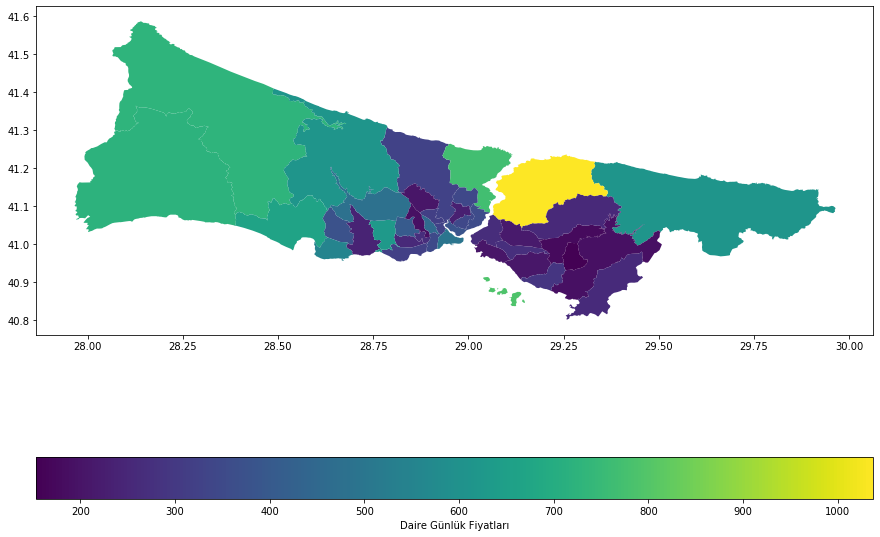

In [17]:
#more on plotting

fig, ax = plt.subplots(1, 1, figsize=(15,15))
ist_neigh_merge.plot(column='price', ax=ax, legend=True, legend_kwds={'label': "Daire Günlük Fiyatları",'orientation': "horizontal"})

In [18]:
# count sayilarını da yazdirarak birde onu map edelim

In [24]:
# sadece price belli değerin üstünde olanları görselleştir
ist_selected = ist_neigh_merge[(ist_neigh_merge['price'] >500 ) & (ist_neigh_merge['neighbourhood'] != "Beykoz")]

ist_selected.head()



,neighbourhood,neighbourhood_group,geometry,id,host_id,neighbourhood_group_left,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,index_right,count
0,Sile,None,"MULTIPOLYGON (((29.40004 41.08274, 29.40101 41...",2.849996e+07,1.313226e+08,NaN,41.149020,29.715138,615.806202,2.062016,4.201550,0.741449,3.015504,251.620155,0.0,129
1,Catalca,None,"MULTIPOLYGON (((28.53614 41.10624, 28.53185 41...",2.093747e+07,1.409854e+08,NaN,41.266476,28.408160,728.076923,2.846154,0.538462,0.140000,1.307692,233.923077,1.0,13
3,Sariyer,None,"MULTIPOLYGON (((29.05429 41.08144, 29.05436 41...",2.540407e+07,1.170302e+08,NaN,41.136732,29.042694,771.029851,6.167164,2.429851,0.541923,3.471642,207.737313,3.0,335
4,Arnavutkoy,None,"MULTIPOLYGON (((28.81849 41.13628, 28.80986 41...",3.746397e+07,2.085300e+08,NaN,41.241225,28.702155,614.500000,1.500000,4.521739,3.183500,1.586957,166.173913,4.0,46
5,Silivri,None,"MULTIPOLYGON (((28.38724 41.04804, 28.38520 41...",2.859904e+07,1.551548e+08,NaN,41.095156,28.223516,723.085106,2.680851,0.531915,0.492727,1.595745,193.340426,5.0,47


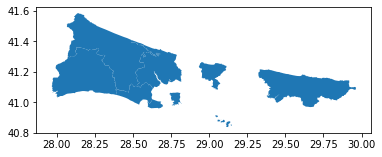

In [25]:
ist_selected.plot()